## <font color ="#fa8231">Proyecto final: Prediccion de gasto en vinos

## <font color ="#fa8231">Fases

1. Datos y planteamiento
2. Análisis exploratorio
3. Modelado predictivo

###  <font color ="#fa8231"> Contexto del dataset y diccionario de datos

**Context**
 **Problem Statement**
 
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.
 
 **Content**
 **Attributes**
 
 **People**
 
 - ID: Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if customer complained in the last 2 years, 0 otherwise
 
 
 **Products**
 
 
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years
 
 
 **Promotion**
 
 
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
 
 
 **Medio de compra**
 
 
 - NumWebPurchases: Number of purchases made through the company’s web site
 - NumCatalogPurchases: Number of purchases made using a catalogue
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s web site in the last month
 
  **Data Source: https://www.kaggle.com/imakash3011/customer-personality-analysis**

In [1]:
#JB
# Manejo de datos
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["ggplot","seaborn-white"])
#plt.style.use(['fivethirtyeight','seaborn-poster'])
sns.set_style('whitegrid')

# Estadística
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librerias adicionales
from base_code.describe_df import data_description
from base_code.explore import remove_outliers,find_upper_outliers, find_lower_outliers#, create_boxplot
#from base_code.feature_selection import variable_normalization,select_kbest
from base_code.modeling import manual_model,final_model,linear_regression,random_forest_regressor

# Librerias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression

# Selección de modelos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [2]:
# Crear dataframe y describir datos de entrada
df = data_description("data/marketing_campaign.csv","\t")


****** Rename Columns: ******

Original column names:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Renamed column names:
 Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accep

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
2228,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0



****** Describe: ******



,education,marital_status,dt_customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



****** Nulls by column: ******

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_costcontact             0
z_revenue                 0
response                  0
dtype: int64

****** Info: ******

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column  

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response



****** Columns correlation: ******



,id,year_birth,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,z_costcontact,z_revenue,response
id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
year_birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
mnt_wines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
mnt_fruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
mnt_meat_products,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
mnt_fish_products,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331



****** Total unique values by column: ******

Number of unique values for column id:  2240 | Percent = 100.0%
Number of unique values for column year_birth:  59 | Percent = 2.63%
Number of unique values for column education:  5 | Percent = 0.22%
Number of unique values for column marital_status:  8 | Percent = 0.36%
Number of unique values for column income:  1974 | Percent = 88.12%
Number of unique values for column kidhome:  3 | Percent = 0.13%
Number of unique values for column teenhome:  3 | Percent = 0.13%
Number of unique values for column dt_customer:  663 | Percent = 29.6%
Number of unique values for column recency:  100 | Percent = 4.46%
Number of unique values for column mnt_wines:  776 | Percent = 34.64%
Number of unique values for column mnt_fruits:  158 | Percent = 7.05%
Number of unique values for column mnt_meat_products:  558 | Percent = 24.91%
Number of unique values for column mnt_fish_products:  182 | Percent = 8.12%
Number of unique values for column mnt_sweet_prod

## Limpieza

In [3]:
# Revisar el porcentaje que representan los 24 nulos de la columna "income"
df.isnull().sum() / len(df)

id                       0.000000
year_birth               0.000000
education                0.000000
marital_status           0.000000
income                   0.010714
kidhome                  0.000000
teenhome                 0.000000
dt_customer              0.000000
recency                  0.000000
mnt_wines                0.000000
mnt_fruits               0.000000
mnt_meat_products        0.000000
mnt_fish_products        0.000000
mnt_sweet_products       0.000000
mnt_gold_prods           0.000000
num_deals_purchases      0.000000
num_web_purchases        0.000000
num_catalog_purchases    0.000000
num_store_purchases      0.000000
num_web_visits_month     0.000000
accepted_cmp3            0.000000
accepted_cmp4            0.000000
accepted_cmp5            0.000000
accepted_cmp1            0.000000
accepted_cmp2            0.000000
complain                 0.000000
z_costcontact            0.000000
z_revenue                0.000000
response                 0.000000
dtype: float64

In [4]:
# Eliminar nulos
df.dropna(inplace=True)
df.isnull().sum()

id                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
z_costcontact            0
z_revenue                0
response                 0
dtype: int64

In [5]:
# Constantes
# Verificamos si tenemos algún campo donde todos los valores son iguales.
filtro = df.nunique() == 1
df.loc[:,filtro]

,z_costcontact,z_revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


In [6]:
# Eliminamos las columnas z_costcontact Y z_revenue porque tienen un valor constante.
df.drop(columns = ['z_costcontact', 'z_revenue'], inplace = True)

In [7]:
# Corregimos tipos de datos (strings, ints, etc)
df.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
response                   int64
dtype: object

In [8]:
# Cambiamos el tipo de dato de la variable dt_customer a fecha
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')
df.dtypes

id                                int64
year_birth                        int64
education                        object
marital_status                   object
income                          float64
kidhome                           int64
teenhome                          int64
dt_customer              datetime64[ns]
recency                           int64
mnt_wines                         int64
mnt_fruits                        int64
mnt_meat_products                 int64
mnt_fish_products                 int64
mnt_sweet_products                int64
mnt_gold_prods                    int64
num_deals_purchases               int64
num_web_purchases                 int64
num_catalog_purchases             int64
num_store_purchases               int64
num_web_visits_month              int64
accepted_cmp3                     int64
accepted_cmp4                     int64
accepted_cmp5                     int64
accepted_cmp1                     int64
accepted_cmp2                     int64


In [9]:
# Revisamos las columnas que tengan 2 valores
filtro = df.nunique() == 2
df.loc[:,filtro]

,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0
2236,0,0,0,1,0,0,0
2237,0,1,0,0,0,0,0
2238,0,0,0,0,0,0,0


In [10]:
# Cambiamos el tipo a booleano.
df['accepted_cmp3'] = df['accepted_cmp3'].astype('bool')
df['accepted_cmp4'] = df['accepted_cmp4'].astype('bool')
df['accepted_cmp5'] = df['accepted_cmp5'].astype('bool')
df['accepted_cmp1'] = df['accepted_cmp1'].astype('bool')
df['accepted_cmp2'] = df['accepted_cmp2'].astype('bool')

df['complain'] = df['complain'].astype('bool')
df['response'] = df['response'].astype('bool')

df.dtypes

id                                int64
year_birth                        int64
education                        object
marital_status                   object
income                          float64
kidhome                           int64
teenhome                          int64
dt_customer              datetime64[ns]
recency                           int64
mnt_wines                         int64
mnt_fruits                        int64
mnt_meat_products                 int64
mnt_fish_products                 int64
mnt_sweet_products                int64
mnt_gold_prods                    int64
num_deals_purchases               int64
num_web_purchases                 int64
num_catalog_purchases             int64
num_store_purchases               int64
num_web_visits_month              int64
accepted_cmp3                      bool
accepted_cmp4                      bool
accepted_cmp5                      bool
accepted_cmp1                      bool
accepted_cmp2                      bool


In [11]:
# No hay duplicados
df.duplicated().sum()

0

## EDA

**Variables de interés:**
- **year_birht -->** generation, client_ age
- **income**
- **kidhome y teenhome -->** children, total_children

- **mnt_wines**

Elegimos estas variables porque creemos que estas características del cliente pueden influir en su gasto en vinos y podremos utilizarlas como variables de entrada para nuestro modelo.

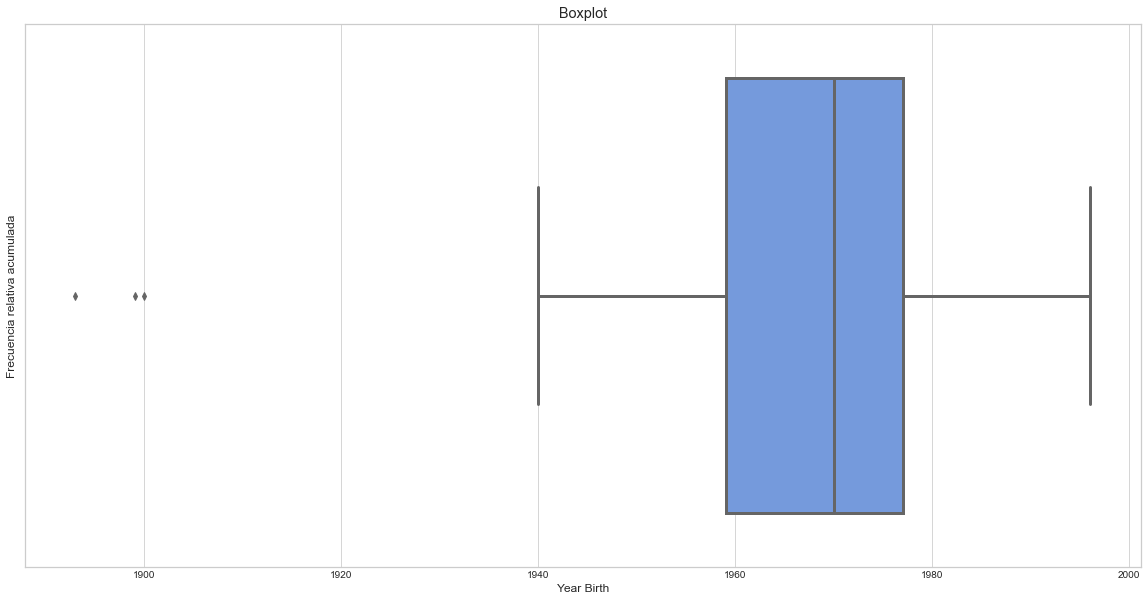

In [12]:
# Boxplot
# Creo boxplot para identificar valores atípicos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'year_birth'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'cornflowerblue'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Year Birth')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribución - Boxplot**
- Q1 vale 1958 o menos aprox.
- Q2 vale 1971 o menos aprox.
- Q3 vale 1977 o menos aprox.
- En Q2 se encuentra la mayor densidad de datos.
- Una fecha menor a 1940 se considera un valor extremo.
- En este caso tenemos solo 3 valores atípicos.

**Tomaremos los registros con año de nacimiento a partir del 1946 (generación Baby Boomers) debido a que años anteriores a este representan clientes mayores de 75 años**

In [13]:
# Tomaremos la variable year_birth como categórica agrupando los años por Generaciones

#    - Generación Silenciosa 1920 - 1940 - Segunda Guerra Mundial 1939 - 1945 -'Silent Generation'
#    - Baby Boomers 1945 - 1964
#    - *Generacion X 1965 - 1980 (1990)
#    - *Generacion Y Millenials 1981 (1991) - 2000
#    - Generacion Z 2001 - 2016
#    - Generacion Alpha 2016 - 2025

# Generar categoría de generación 
# No incluimos Generaciones Silenciosa y Z 

limites = [1945, 1964, 1980, 2000]
etiquetas = ['Baby Boomers', 'Generation X', 'Millenials']
pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df['generation'] = pd.cut(x = df['year_birth'], bins = limites, labels = etiquetas)
df.generation.value_counts()

Generation X    1061
Baby Boomers     749
Millenials       380
Name: generation, dtype: int64

In [14]:
# Volvemos a revisar los registros nulos.
df.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                    0
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
response                  0
generation               26
dtype: int64

In [15]:
# filtro1 = df.year_birth < 1946
# df[filtro1]

In [16]:
# filtro = df.generation.isnull()
# df[filtro]

In [17]:
# Eliminar nulos
df.dropna(inplace=True)
df.isnull().sum()

id                       0
year_birth               0
education                0
marital_status           0
income                   0
kidhome                  0
teenhome                 0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat_products        0
mnt_fish_products        0
mnt_sweet_products       0
mnt_gold_prods           0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cmp3            0
accepted_cmp4            0
accepted_cmp5            0
accepted_cmp1            0
accepted_cmp2            0
complain                 0
response                 0
generation               0
dtype: int64

In [18]:
# Crear variable para la edad de nuestros clientes.
current_date = datetime.datetime.now()
date = current_date.date()
df["client_age"] = date.year - df["year_birth"]

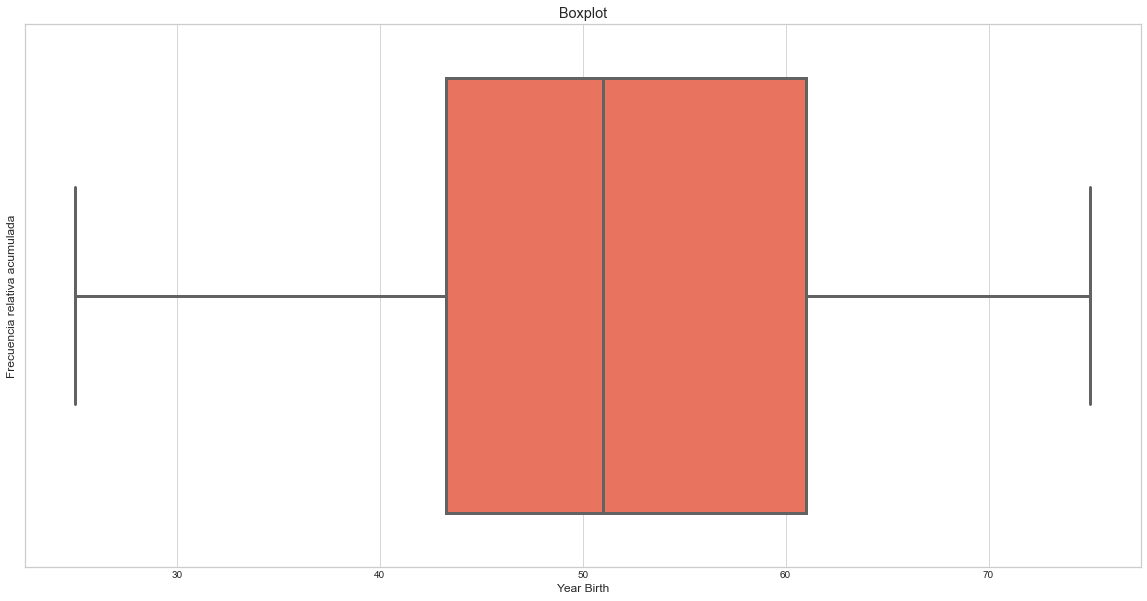

In [19]:
# Boxplot
# Creo boxplot para identificar valores atípicos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'client_age'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'tomato'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Year Birth')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribución - Boxplot**
- Q1 vale 44 o menos aprox.
- Q2 vale 52 o menos aprox.
- Q3 vale 62 o menos aprox.
- En Q3 se encuentra la mayor densidad de datos.
- El valor máximo es 75.

In [20]:
# Verificamos los valores de los cuartiles.
df["client_age"].describe()

count    2190.000000
mean       51.818721
std        11.472075
min        25.000000
25%        43.250000
50%        51.000000
75%        61.000000
max        75.000000
Name: client_age, dtype: float64

In [21]:
# Eliminar outliers par la variable "client_age"
# df = remove_outliers(df,"client_age")
# df["client_age"].describe()

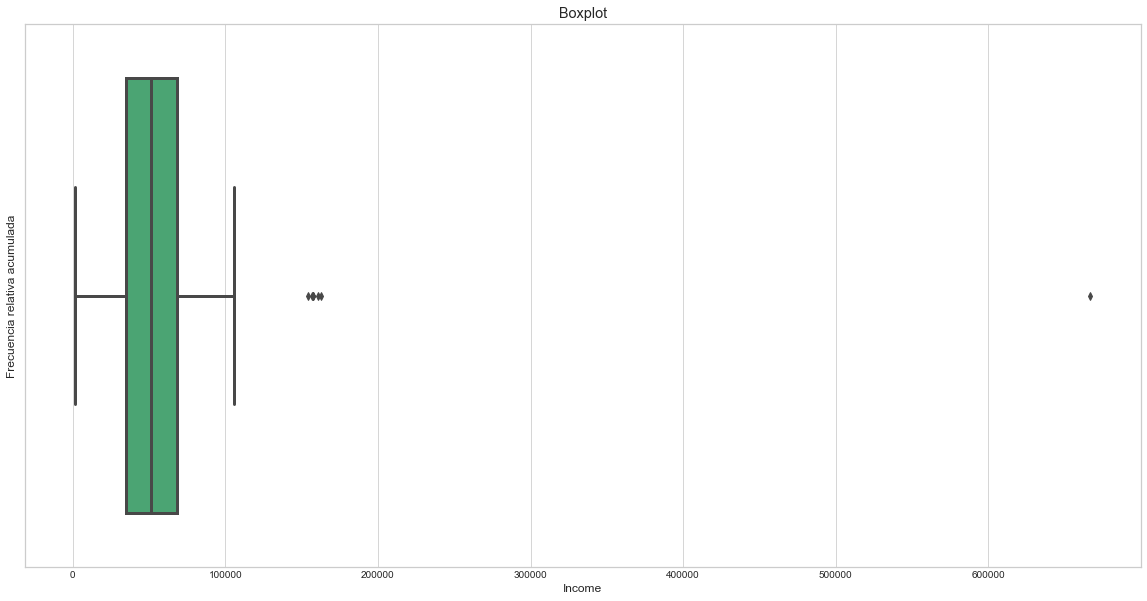

In [22]:
# Boxplot
# Creo boxplot para identificar valores atípicos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'income'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'mediumseagreen'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('Income')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribución - Boxplot**

- Q1 vale 30,000 o menos aprox.
- Q2 vale 50,000 o menos aprox.
- Q3 vale 65,000 o menos aprox.
- En Q4 se encuentra la mayor densidad de datos.
- Un salario mayor a 110,000 aprox, se considera un valor atípico.
- Vemos un registro con un salario extremo de más de 600,000.

In [23]:
# Verificamos los valores de los cuartiles.
df["income"].describe()

count      2190.000000
mean      52079.040639
std       25209.682533
min        1730.000000
25%       34972.000000
50%       51222.500000
75%       68343.000000
max      666666.000000
Name: income, dtype: float64

In [24]:
#Analizo el gasto en productos de los registros outliers de income.
income = df[df['income']<=150000]['mnt_wines'].sum()
out_income = df[df['income']>150000]['mnt_wines'].sum()

total_income = income + out_income

p_income = (income / total_income) * 100
p_out_income = (out_income / total_income) * 100

print('Gasto de Income    :' + str(income))
print('Gasto de Outliers  :' + str(out_income))

print('Gasto Total        :' + str(total_income))
print('% Gasto de Income  :' + str(p_income))
print('% Gasto de Outliers:' + str(p_out_income))

Gasto de Income    :662224
Gasto de Outliers  :212
Gasto Total        :662436
% Gasto de Income  :99.96799690838058
% Gasto de Outliers:0.03200309161941682


**El gasto en vinos de los "outliers" de income representan solo el % 0.03 del total de compras. Por esta razón decidimos eliminarlos de nuestro dataset.**

In [25]:
filtro = df.income <= 150000
df[filtro].sort_values(by = 'income', ascending = False).head(1)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,generation,client_age
646,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,...,3,False,False,True,True,False,False,True,Generation X,51


In [26]:
filtro = df.income > 150000
df[filtro].sort_values(by = 'income', ascending = True)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,generation,client_age
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,False,False,False,False,False,False,False,Generation X,46
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,False,False,False,False,False,False,False,Baby Boomers,72
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,False,False,False,False,False,False,False,Generation X,44
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,False,False,False,False,False,False,False,Generation X,48
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,False,False,False,False,False,False,False,Generation X,50
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,False,False,False,False,False,False,False,Millenials,39
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,False,False,False,False,False,False,False,Generation X,45
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,False,False,False,False,False,False,False,Generation X,44


In [27]:
# Eliminar outliers par la variable "income"
df = remove_outliers(df,"income")
df["income"].describe()

count      2182.000000
mean      51457.499083
std       20693.986979
min        1730.000000
25%       34946.000000
50%       51075.000000
75%       68124.000000
max      105471.000000
Name: income, dtype: float64

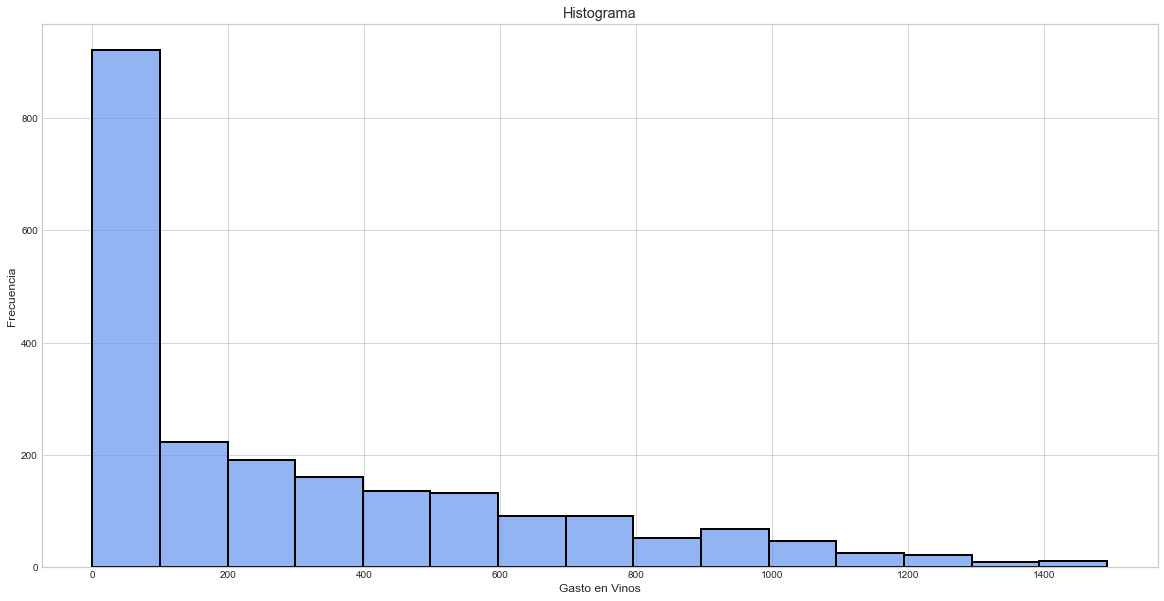

In [28]:
# Exploro la variable mnt_wines de manera general.
# Crea tu "canvas"
fig, ax = plt.subplots(figsize = (20,10))

# Dibuja en tu canvas
_ = sns.histplot(data = df, x = 'mnt_wines',
                bins = 15,
#                 binwidth = 1000,
#                 binrange = (1000,5000), 
                element = 'bars',
                edgecolor = 'black',
                linewidth = 2,
                color = 'cornflowerblue',
                alpha = .7,
#                 kde = True
                ax = ax)

_ = ax.set_title('Histograma')
_ = ax.set_xlabel('Gasto en Vinos')
_ = ax.set_ylabel('Frecuencia')

**Distribución - Histograma**

- El importe mínimo es 0 y máximo 1,500 aprox.
- Hay sesgo hacia la derecha (tenemos valores mayores).

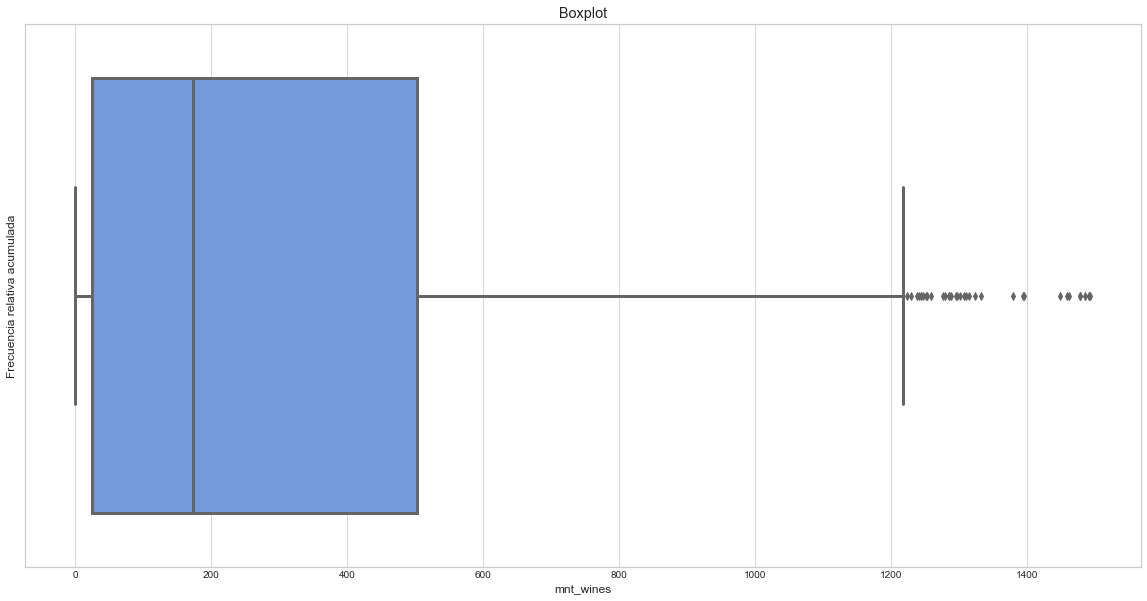

In [29]:
# Boxplot
# Creo boxplot para identificar valores atípicos.
# Crear "canvas"
fig, ax = plt.subplots(figsize = (20,10))
# Dibujar en canvas
_ = sns.boxplot(data = df, x = 'mnt_wines'
#                 showfliers = True,
#                 fliersize = 100,
                , color = 'cornflowerblue'
                , linewidth = 3
                , ax = ax)
_ = ax.set_title('Boxplot')
_ = ax.set_xlabel('mnt_wines')
_ = ax.set_ylabel('Frecuencia relativa acumulada')

**Distribución - Boxplot**

- Q1 vale 20 o menos aprox.
- Q2 vale 180 o menos aprox.
- Q3 vale 500 o menos aprox.
- En Q4 se encuentra la mayor densidad de datos.
- Un importe mayor a 1,220 aprox, se considera un valor atípico.
- El valor máximo es de 1,500 aprox.

In [30]:
df["mnt_wines"].describe()

count    2182.000000
mean      303.494042
std       336.230495
min         0.000000
25%        24.000000
50%       173.000000
75%       502.750000
max      1493.000000
Name: mnt_wines, dtype: float64

In [31]:
find_upper_outliers(df,"mnt_wines")

{1224,
 1230,
 1239,
 1241,
 1245,
 1248,
 1252,
 1253,
 1259,
 1276,
 1279,
 1285,
 1288,
 1296,
 1298,
 1302,
 1308,
 1311,
 1315,
 1324,
 1332,
 1379,
 1394,
 1396,
 1449,
 1459,
 1462,
 1478,
 1486,
 1492,
 1493}

In [32]:
 filtro = df.mnt_wines <= 1224
 df[filtro].sort_values(by = 'mnt_wines', ascending = False).head(1)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cmp3,accepted_cmp4,accepted_cmp5,accepted_cmp1,accepted_cmp2,complain,response,generation,client_age
1115,4356,1971,Graduation,Together,71819.0,0,1,2013-08-28,70,1224,...,6,False,True,True,False,False,False,False,Generation X,50


In [33]:
#Analizo el gasto en productos de los registros outliers de mnt_wines.
wine = df[df['mnt_wines']<1224]['mnt_wines'].sum()
out_wine = df[df['mnt_wines']>=1224]['mnt_wines'].sum()

total_wine = wine + out_wine

p_wine = (wine / total_wine) * 100
p_out_wine = (out_wine / total_wine) * 100

print('Gasto de Wine      :' + str(wine))
print('Gasto de Outliers  :' + str(out_wine))

print('Gasto Total        :' + str(total_wine))
print('% Gasto de Wine    :' + str(p_wine))
print('% Gasto de Outliers:' + str(p_out_wine))

Gasto de Wine      :616676
Gasto de Outliers  :45548
Gasto Total        :662224
% Gasto de Wine    :93.12196477324893
% Gasto de Outliers:6.87803522675107


**El gasto en vino de los "outliers" drepresentan el %6 del total de compras. Consideramos que es un porcentaje bajo, por esta razón decidimos eliminarlos de nuestro dataset.**

In [34]:
# Eliminar outliers par la variable "mnt_wines"
df = remove_outliers(df,"mnt_wines")
df["mnt_wines"].describe()

count    2148.000000
mean      287.093110
std       312.148463
min         0.000000
25%        23.000000
50%       168.500000
75%       483.000000
max      1218.000000
Name: mnt_wines, dtype: float64

In [35]:
# Crear variable "children"
df["children"] = df["kidhome"] + df["teenhome"]
df["children"] = df["children"].apply(lambda value: 1 if value != 0 else 0)
#df.children.head(9)

In [36]:
# Crear variable "total_children"
df["total_children"] = df["kidhome"] + df["teenhome"]

In [37]:
# Agregar columna "income_type".
# Separo el income en 3 categorías low, medium y high.

df['income_type'] = df['income'].apply(lambda value: 'low'
                                       if value <= 50000 else 'medium'
                                       if value <= 70000 else 'high')

In [38]:
# Shape final
print(df.shape)

(2148, 32)


## GEDA

In [39]:
# Genero un dataframe de gasto en productos agrupando por tipo de salario y tipo de producto.
df_productos = df.melt(id_vars=['income_type'], value_vars=['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_prods'], var_name='product_type', value_name='mnt_products')
df_productos.sort_values(by = ['income_type'])

,income_type,product_type,mnt_products
6443,high,mnt_meat_products,272
6194,high,mnt_meat_products,689
6193,high,mnt_meat_products,309
6190,high,mnt_meat_products,106
6189,high,mnt_meat_products,818
...,...,...,...
10164,medium,mnt_sweet_products,19
10165,medium,mnt_sweet_products,19
765,medium,mnt_wines,53
10153,medium,mnt_sweet_products,0


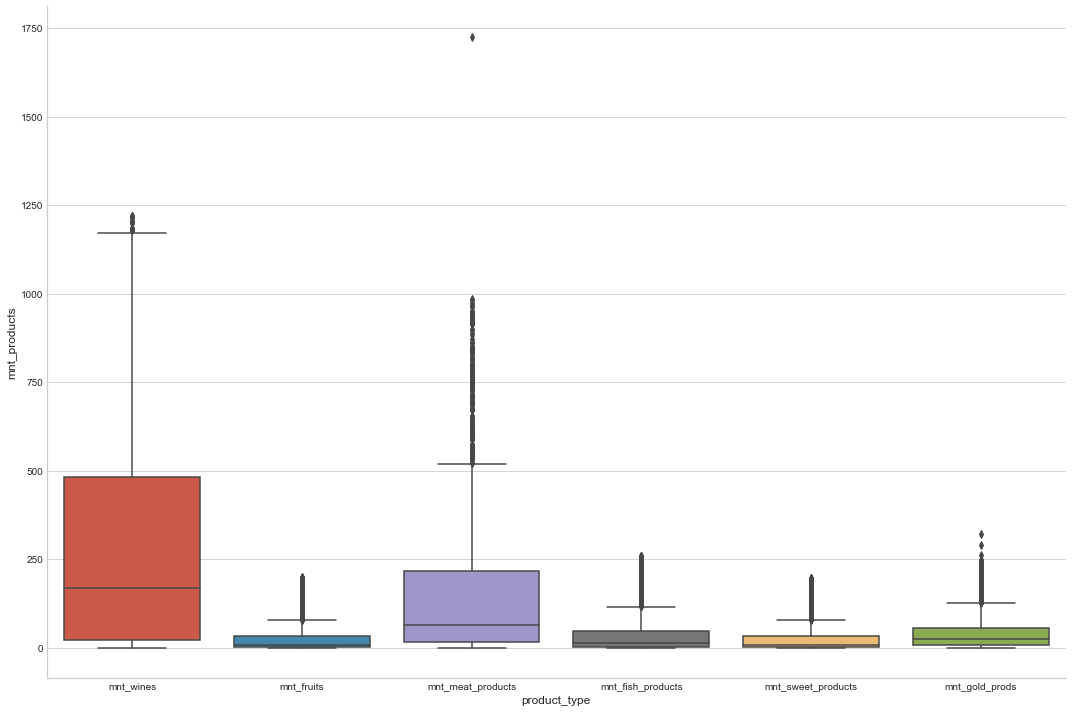

In [40]:
#Gráfica de Gasto en Productos
_ = sns.catplot(data = df_productos, x = 'product_type', y = 'mnt_products', kind = 'box',
            #estimator = np.median,
            ci = None,
            height = 10,
            aspect = 1.5,
            )

# sns.stripplot(x = 'product_type', y = 'mnt_products', data = df_productos)

**Aquí podemos observar que en promedio, los productos que mas compraron nuestros clientes son Vinos seguido de Carnes.**

In [41]:
df.mnt_wines.describe()

count    2148.000000
mean      287.093110
std       312.148463
min         0.000000
25%        23.000000
50%       168.500000
75%       483.000000
max      1218.000000
Name: mnt_wines, dtype: float64

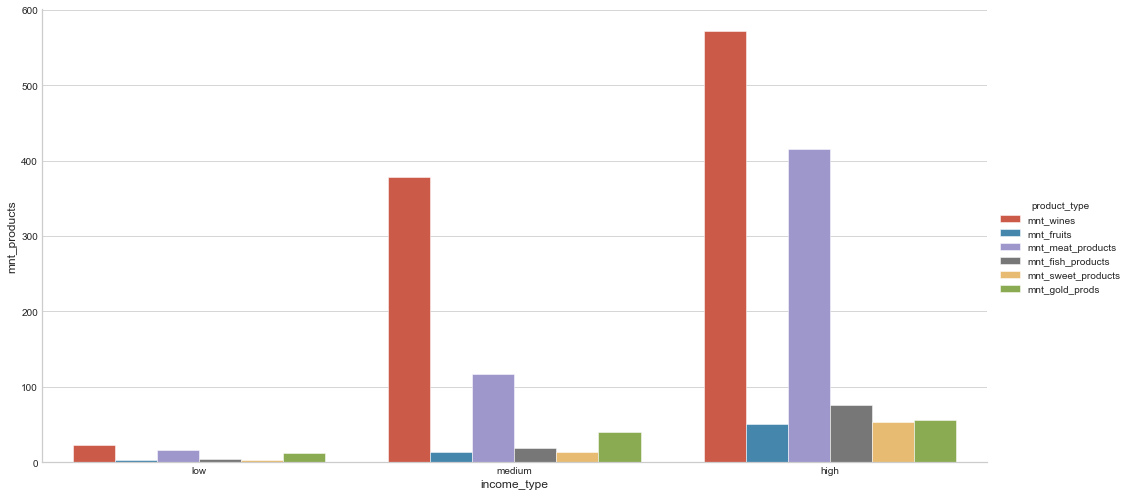

In [42]:
#Gráfica de Gasto de Productos por salario
_ = sns.catplot(data = df_productos, x = 'income_type', y = 'mnt_products', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 2,
            hue = 'product_type'
            )

**Esta gráfica nos muestra que en promedio, a mayor ingreso de nuestros clientes, mayor es su gasto en productos.**

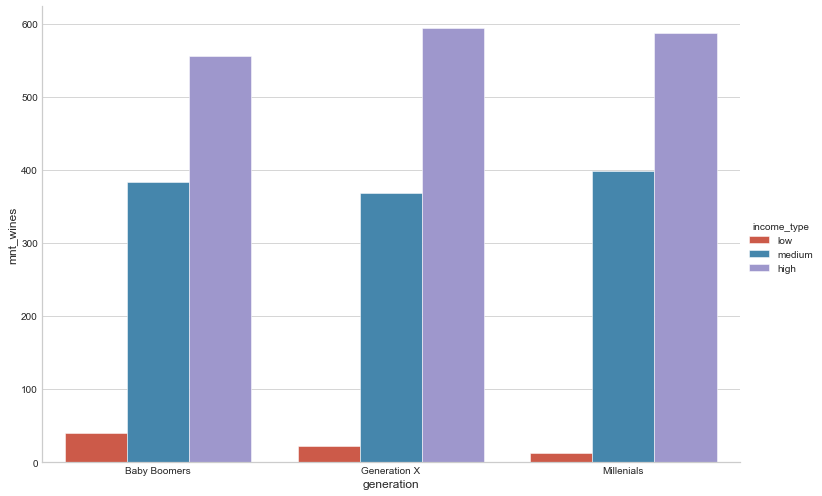

In [43]:
#Gráfica Gasto en Vinos por generación
_ = sns.catplot(data = df, x = 'generation', y = 'mnt_wines', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 1.5,       
            hue = 'income_type',
            hue_order=('low', 'medium', 'high')
            )

**Aquí observamos que en promedio, el gasto en vinos no tiene una variación muy significativa si lo analizamos por generación(edad) de nuestro cliente.**

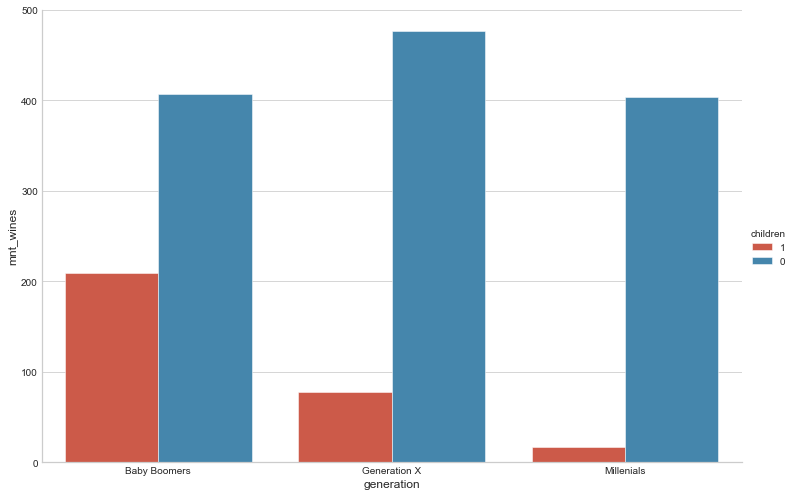

In [44]:
#Gráfica Gasto en Vinos por generación
_ = sns.catplot(data = df, x = 'generation', y = 'mnt_wines', kind = 'bar',
            estimator = np.median,
            ci = None,
            height = 7,
            aspect = 1.5,       
            hue = 'children',
            hue_order=(1,0)
            )

**Aquí observamos lo siguientes:**

- En promedio, el gasto en vinos es mayor en clientes sin hijos.

- Para los que SI tienen hijos, en promedio, el gasto en vinos es mayor en clientes de mayor edad.

## Parte 1 - Modelo manual simple

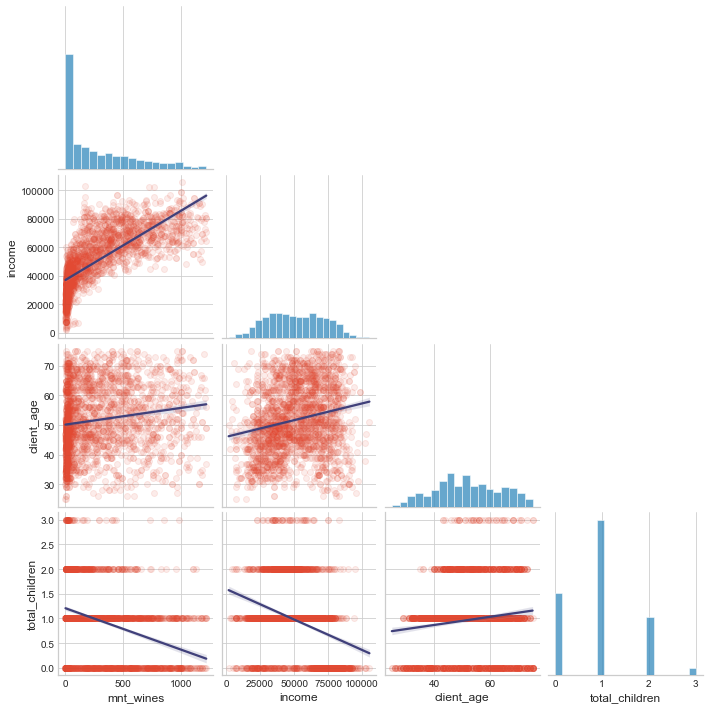

In [45]:
#AM 
# cCrear grafico para variables seleccionadas
# mnt_wines mnt_meat_products | children total_children
cols_traditional_model = ["mnt_wines","income","client_age","total_children"]
#cols_traditional_model = ["mnt_meat_products","income","children"]
df_traditional_model = df[cols_traditional_model]
sns.pairplot(data=df_traditional_model,corner=True,kind="reg",plot_kws={"line_kws":{'color':"#40407a"},"scatter_kws":{"alpha":0.1}});  

Coeficiente de correlación de Pearson y p-value (0.7371334647311012, 0.0)


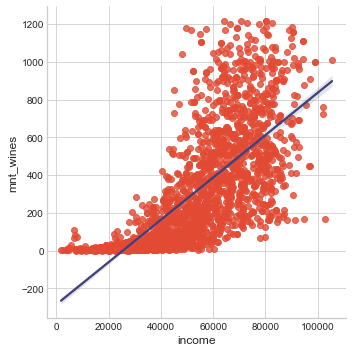

In [46]:
x1 = cols_traditional_model[1]
y = cols_traditional_model[0]
sns.lmplot(x=x1,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x1],df[y]))

Coeficiente de correlación de Pearson y p-value (0.15364969903601594, 8.095047963525178e-13)


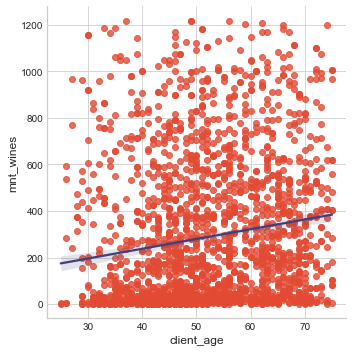

In [47]:
x2 = cols_traditional_model[2]
sns.lmplot(x=x2,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x2],df[y]))

Coeficiente de correlación de Pearson y p-value (-0.3513639028878198, 1.9265563703894111e-63)


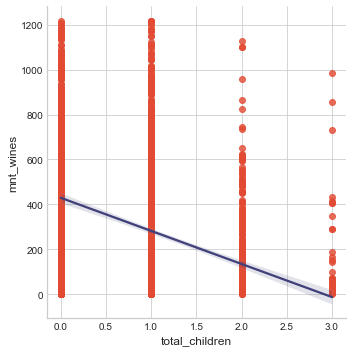

In [48]:
x3 = cols_traditional_model[3]
sns.lmplot(x=x3,y=y,data=df,line_kws={"color":"#40407a"});
print("Coeficiente de correlación de Pearson y p-value",st.pearsonr(df[x3],df[y]))

**Coeficiente de correlación de Pearson**
+ Grado de linealidad
+ $0$: no hay relación lineal
+ $1$: relación lineal perfecta
+ $-1$: relación lineal inversa perfecta

**p-value**
+ significancia de la linealidad
+ Si $p-value<0.05$, entonces podemos decir que el modelo de regresión es significativo



=> **Seleccion de variables predictoras(x) y target(y) de acuerdo a EDA**


In [49]:
# Variables predictoras
x = df_traditional_model[cols_traditional_model[1:]]
# Variable target
y = df_traditional_model[cols_traditional_model[0]]

In [50]:
# JBM
# Utilizamos VIF (Variance Inflation Factor) para evaluar la Multicolinearidad
# Multicolinearidad: Se presenta cuando una de las variables de entrada puede obtenerse a partir de otra de las variables de entrada

# Si Coeficiente de Pearson es igual a  1  ó  −1 , entonces hay multicolinearidad
# Si  𝑉𝐼𝐹>10 , entonces la multicolinearidad es alta
# Lo ideal es que  𝑉𝐼𝐹<5

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,income,client_age,total_children
vif,7.350324,11.114519,2.928686



* **Crea un train y un test set**


In [51]:
# Dividimos en conjunto de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (1718, 3)
y_train (1718,)
x_test (430, 3)
y_test (430,)


In [52]:
# El conjunto de entrenamiento lo dividimos en conjunto de entrenamiento y conjunto de validación
x_train_final, x_validation, y_train_final, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 3)
print('x_train_final',x_train_final.shape)
print('y_train_final',y_train_final.shape)
print('x_validation',x_validation.shape)
print('y_validation',y_validation.shape)

x_train_final (1374, 3)
y_train_final (1374,)
x_validation (344, 3)
y_validation (344,)


* **Preprocesa**
    - Si es una variable cualitativa usa onehot encoding o cualquier método de tu agrado, explica por qué es necesario preprocesar estas variables diferente a las cuantitativa
    - Si es una variable cuantitativa deberás estandarizar la variable utilizando el método de tu agrado, explica por qué es necesario/recomendado estandarizar variables

* **Especifíca qué modelo vas a utlizar**
    - Justifica por qué vas a usar ese modelo en particular y no otro
    - Para nuestro caso de uso necesitamos un modelo que nos ayude a predecir el consumo en           costo del vino. Por lo tanto necesitamos un modelo para regresion lineal. Vamos a               explorar los siguientes modelos: Linear Regression y Random Forest Regressor


* **Entrena tu modelo y realiza optimización de hiperparámetros con GridSearchCV**
    - Explica por qué es necesario hacer validación cruzada para encontrar los mejores hiperparámetros
    - Explica por qué es necesario optimizar los hiperparámetros
    - Describe claramente qué hace cada hiperparámetro que haya seleccionado y por qué lo seleccionaste
    - Interpreta los resultados de la validación cruzada y asegurate de que tu modelo no esté sobreajustado


* **Muestra e interpreta las métricas de desempeño de tu modelo**


In [53]:
df_manual_model,coef,intercept,model_LR = manual_model(x_train_final,y_train_final,x_validation,y_validation)
df_manual_model

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Model,Columns,r2 Train,r2 Validate,RMSE Train,RMSE Validate
0,Linear Regression,"['income', 'client_age', 'total_children']",0.545141,-3.100653,211.732621,613.062675
1,Random Forest Regressor,"['income', 'client_age', 'total_children']",0.936096,0.601608,79.361885,191.088155


Modelo simple split
significa que 58% de la variación del consumo de vinos/carnes puede explicarse a través de las variables de entrada que utilizamos

In [54]:
print("Coeficiente: ",coef)
print("Intercepto: ",intercept)

Coeficiente:  [ 1.04152118e-02  1.27128617e+00 -5.99638044e+01]
Intercepto:  -250.1838617632868


Por cada unidad que aumenta cada uno de los tres variables, nuestra compra de vinos aumentara veces cada coeficiente asumiendo que es la unica variable afecta el gasto.

## Parte 2 - Modelo manual estandarizado

In [55]:
#JB
x_scale = StandardScaler().fit_transform(x)

In [56]:
x_scale

array([[-1.13467698, -1.03022673,  0.04500415],
       [-1.78326257, -2.34151317, -1.29761963],
       [-2.02068426, -0.59313124,  0.04500415],
       ...,
       [ 1.41839793, -0.24345486,  0.04500415],
       [ 0.95597862, -1.29248402, -1.29761963],
       [ 1.41839793, -0.24345486,  0.04500415]])

In [57]:
#Otra vez split de los datos: train y test
#NOTA: Las variables numéricas ya están estandarizadas
# split de los datos
x_train_m2, x_test_m2, y_train_m2, y_test_m2 = train_test_split(x_scale, y, test_size = 0.3, random_state = 2)
print('x_train:',x_train_m2.shape)
print('y_train:',y_train_m2.shape)
print('x_test:',x_test_m2.shape)
print('y_test:',y_test_m2.shape)

x_train: (1503, 3)
y_train: (1503,)
x_test: (645, 3)
y_test: (645,)


In [58]:
# El conjunto de entrenamiento lo dividimos en conjunto de entrenamiento y conjunto de validación
x_train_final_m2, x_validation_m2, y_train_final_m2, y_validation_m2 = train_test_split(x_train_m2, y_train_m2, test_size = 0.2, random_state = 3)
print('x_train_final',x_train_final_m2.shape)
print('y_train_final',y_train_final_m2.shape)
print('x_validation',x_validation_m2.shape)
print('y_validation',y_validation_m2.shape)

x_train_final (1202, 3)
y_train_final (1202,)
x_validation (301, 3)
y_validation (301,)


In [59]:
# De nuevo entrenamos el modelo
# Algoritmo: regresión lineal
est = LinearRegression()
est.fit(x_scale,y)

LinearRegression()

In [60]:
# intercepto y los coeficientes
print('intercepto:',est.intercept_)
print('coeficiente:',est.coef_)

intercepto: 287.09310986964624
coeficiente: [215.36708065   9.25294642 -37.71058883]


In [61]:
coefficients = pd.DataFrame(index=x.columns,data=est.coef_.T,columns=['Coef.'])
coefficients

,Coef.
income,215.367081
client_age,9.252946
total_children,-37.710589


**Importancia de las variables.**
+ Tomamos el valor absoluto de los coeficientes. A mayor valor absoluto, mayor importancia de la variable.
En este caso el orden de importancia es el siguiente:
- income
- total_children
- client_age


In [62]:
# score
train_score_est = est.score(x_train_final_m2, y_train_final_m2)
test_score_est = est.score(x_validation_m2, y_validation_m2)
print('MODELO ESTANDARIZADO \n train score:', train_score_est)
print(' test score:', test_score_est)

MODELO ESTANDARIZADO 
 train score: 0.5400879024259084
 test score: 0.5844511021857602


In [63]:
# Coeficiente de determinación ajustado
# Se utiliza en regresión múltiple
# Siempre será igual o menor que el coeficiente de determinación (score)
# Escala al coeficiente de determinación dependiendo el número de parámetros
# Se utiliza este coeficiente para obtener una mejor métirca en regresión lineal
def adj_r2(x,y):
    r2 = est.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [64]:
adj_r2(x_train_m2,y_train_m2)

0.5484334932785391

In [65]:
adj_r2(x_validation_m2,y_validation_m2)

0.5802536385714749

## Parte 3 - Modelo con cross validation

In [66]:
#AM
#Algoritmo: Linear Regression
LR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("LR",LinearRegression())])
#LR_model_CV.fit(x_train,y_train)
print(type(LR_model_CV))

<class 'sklearn.pipeline.Pipeline'>


In [67]:
# Monitoreando dos metricas o mas
LR1 = cross_validate(LR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [68]:
df_cv = pd.DataFrame(LR1)
df_cv["LR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,LR_r2_avg,LR_RMSE_avg
2,0.004879,0.001952,0.551147,-215.018033,0.549263,-208.788086
0,0.004664,0.002212,0.547960,-214.587623,0.549263,-208.788086
4,0.004507,0.001930,0.519016,-207.237476,0.549263,-208.788086
1,0.006048,0.001914,0.586648,-207.010688,0.549263,-208.788086
3,0.005030,0.001746,0.541545,-200.086607,0.549263,-208.788086


Evaluar el modelo

In [69]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.06763177605988835
Diferencia de RMSE:  14.931425441098185


In [70]:
LR2 = cross_validate(LR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [71]:
df_cv = pd.DataFrame(LR2)
df_cv["LR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["LR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,LR_r2_avg,LR_RMSE_avg
1,0.004774,0.001527,0.545159,-212.724290,0.547309,-203.1077
4,0.003533,0.001470,0.507560,-210.835130,0.547309,-203.1077
2,0.003362,0.001454,0.610143,-209.538144,0.547309,-203.1077
3,0.002945,0.001446,0.533141,-193.118973,0.547309,-203.1077
0,0.007384,0.002359,0.540543,-189.321964,0.547309,-203.1077


In [72]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.10258252977996496
Diferencia de RMSE:  23.4023267209339


In [73]:
# Algoritmo: Random Forest Regressor
RFR_model_CV = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("RFR",RandomForestRegressor())])
#RFR_model_CV.fit(x_train,y_train)
print(type(RFR_model_CV))

<class 'sklearn.pipeline.Pipeline'>


In [74]:
# Monitoreando dos metricas o mas
RFR1 = cross_validate(RFR_model_CV,x_train,y_train,cv=5,scoring=["r2","neg_root_mean_squared_error"])

In [75]:
df_cv = pd.DataFrame(RFR1)
df_cv["RFR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,RFR_r2_avg,RFR_RMSE_avg
2,0.242785,0.015394,0.503641,-226.110418,0.529511,-213.117615
0,0.297772,0.013802,0.524984,-219.973541,0.529511,-213.117615
3,0.255774,0.013884,0.491537,-210.716875,0.529511,-213.117615
4,0.248467,0.013011,0.520310,-206.958498,0.529511,-213.117615
1,0.232776,0.012781,0.607083,-201.828745,0.529511,-213.117615


In [76]:
print("Linear Regression con validacion cruzada\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada

Diferencia de R2:  0.11554599879698679
Diferencia de RMSE:  24.2816726262094


In [77]:
RFR2 = cross_validate(RFR_model_CV,x_train,y_train,scoring=['r2','neg_root_mean_squared_error'], cv=ShuffleSplit(5))

In [78]:
df_cv = pd.DataFrame(RFR2)
df_cv["RFR_r2_avg"] = df_cv["test_r2"].sum()/df_cv.shape[0]
df_cv["RFR_RMSE_avg"] = df_cv["test_neg_root_mean_squared_error"].sum()/df_cv.shape[0]
df_cv.sort_values(by=["test_neg_root_mean_squared_error"])

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,RFR_r2_avg,RFR_RMSE_avg
3,0.253844,0.010918,0.524415,-211.611315,0.549717,-200.730986
4,0.249412,0.011426,0.466219,-209.397828,0.549717,-200.730986
0,0.319467,0.010809,0.531774,-201.261953,0.549717,-200.730986
1,0.253247,0.010799,0.578093,-196.346212,0.549717,-200.730986
2,0.259723,0.010857,0.648081,-185.037622,0.549717,-200.730986


In [79]:
print("Linear Regression con validacion cruzada con grupos aleatorios\n")
print("Diferencia de R2: ",df_cv.test_r2.max() - df_cv.test_r2.min())
print("Diferencia de RMSE: ",df_cv.test_neg_root_mean_squared_error.max() - df_cv.test_neg_root_mean_squared_error.min())

Linear Regression con validacion cruzada con grupos aleatorios

Diferencia de R2:  0.18186200718541712
Diferencia de RMSE:  26.573692488647822


## Parte 4 - Multi-modelo usando validacion cruzada y GridSearchCV

In [80]:
# Algoritmo: LinearRegression
multi_model = Pipeline(steps=[("Scaler",StandardScaler()),
                              ("model",LinearRegression())])
print(type(multi_model))

<class 'sklearn.pipeline.Pipeline'>


In [81]:
multi_model.named_steps["model"]

LinearRegression()

In [82]:
#Algoritmos: Linear Regression, Logistic Regression, KNeighborsRegressor and DecisionTreeRegressor.
param_grid = [{"model":[LinearRegression()],
               "model__fit_intercept":[True,False],
               "model__copy_X":[True]},
              {"model":[RandomForestRegressor()],
               "model__max_depth":[1,2,3,4,5,6],
               "model__max_samples":np.linspace(0.01,1,10),
               "model__bootstrap":[True]},
              {"model":[KNeighborsRegressor()],
               "model__n_neighbors":[1,2,3,4,5,6],
               "model__algorithm":["auto","ball_tree","kd_tree","brute"],
               "model__leaf_size":[30,60,90]},
              {"model":[DecisionTreeRegressor()],
               "model__criterion":["squared_error","absolute_error"],
               "model__splitter":["best","random"],
               "model__max_depth":[1,2,3,4,5,6]}]

In [83]:
# Instrucciones
grid_search_cv = GridSearchCV(estimator = multi_model,
                  param_grid = param_grid,
                  cv = 5,
                  scoring="neg_root_mean_squared_error")

In [84]:
# JBM
# Aquí se puede usar ShuffleSplit(5)?
# Podemos agregar la metrica R2?

In [85]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()],
                          'model__copy_X': [True],
                          'model__fit_intercept': [True, False]},
                         {'model': [RandomForestRegressor(max_depth=4,
                                                          max_samples=0.23)],
                          'model__bootstrap': [True],
                          'model__max_depth': [1, 2, 3, 4, 5, 6],
                          'model__max_samples': ar...
                         {'model': [KNeighborsRegressor()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__leaf_size': [30, 60, 90],
                          'model__n_neighbors': [1, 2, 3, 4, 5, 6]},
                  

In [86]:
# Revisar tipo de objecto
type(grid_search_cv)

sklearn.model_selection._search.GridSearchCV

In [87]:
results = pd.DataFrame(grid_search_cv.cv_results_).sort_values(by='rank_test_score')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__copy_X,param_model__fit_intercept,param_model__bootstrap,param_model__max_depth,param_model__max_samples,...,param_model__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,0.100433,0.010507,0.009708,0.001261,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,4,0.23,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-206.232926,-204.996919,-210.405105,-193.600819,-198.600334,-202.767221,5.944843,1
37,0.118071,0.005900,0.009369,0.000409,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,4,0.56,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-208.096489,-201.728479,-210.973954,-195.785179,-197.592850,-202.835390,5.870781,2
23,0.091446,0.003785,0.009097,0.000466,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,3,0.12,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-206.304704,-203.844739,-210.336873,-194.918836,-199.710490,-203.023129,5.321424,3
26,0.110501,0.001053,0.009077,0.000292,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,3,0.45,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-208.393352,-203.717846,-209.697129,-194.318443,-199.089876,-203.043329,5.746376,4
33,0.096051,0.000736,0.009424,0.000478,"RandomForestRegressor(max_depth=4, max_samples...",NaN,NaN,True,4,0.12,...,NaN,"{'model': RandomForestRegressor(max_depth=4, m...",-205.740988,-204.727909,-210.192591,-196.206492,-198.763872,-203.126370,5.024913,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.003507,0.000620,0.002636,0.000365,KNeighborsRegressor(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': KNeighborsRegressor(), 'model__algor...",-275.965467,-282.168693,-265.249027,-263.249951,-265.629699,-270.452567,7.346758,150
74,0.003552,0.000516,0.002588,0.000354,KNeighborsRegressor(),NaN,NaN,NaN,NaN,NaN,...,NaN,"{'model': KNeighborsRegressor(), 'model__algor...",-275.965467,-282.168693,-265.249027,-263.249951,-265.629699,-270.452567,7.346758,150
135,0.003053,0.000219,0.001730,0.000408,DecisionTreeRegressor(),NaN,NaN,NaN,1,NaN,...,random,"{'model': DecisionTreeRegressor(), 'model__cri...",-282.159650,-315.132368,-252.561700,-294.290161,-287.080680,-286.244912,20.254174,156
147,0.009751,0.000870,0.001603,0.000208,DecisionTreeRegressor(),NaN,NaN,NaN,1,NaN,...,random,"{'model': DecisionTreeRegressor(), 'model__cri...",-233.230311,-302.818000,-302.651812,-297.640874,-302.663131,-287.800826,27.355888,157


In [88]:
# Mejor RMSE
grid_search_cv.best_score_

-202.76722076592205

In [89]:
# Parametro con los que se obtuvo el mejor RMSE
grid_search_cv.best_params_

{'model': RandomForestRegressor(max_depth=4, max_samples=0.23),
 'model__bootstrap': True,
 'model__max_depth': 4,
 'model__max_samples': 0.23}

Evaluar el modelo
- Modelo Simple
- Modelo con pipeline
- Multi-modelo con pipeline

Re-entrenar el modelo

In [90]:
# Mejor modelo con parametros
grid_search_cv.best_estimator_


Pipeline(steps=[('Scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=4, max_samples=0.23))])

In [91]:
# Re-entrenar el modelo con los mejores parámetros
## Hacer validacion cruzada
#cross_val_score(grid_search_cv,x_train,y_train, scoring="neg_root_mean_squared_error", cv=5)
grid_search_cv.fit(x_train,y_train);

Predicciones

In [92]:
y_pred = grid_search_cv.predict(x_test)
y_pred

array([585.32518121, 723.60829635,  12.20120589, 176.96015297,
       225.73292562, 529.61336827,  38.03126653,  50.56953402,
        12.11702504,  95.43803741,  78.53609199,  63.18817072,
        47.69042326, 117.54853108,  37.97496492,  44.17703896,
        38.3315415 ,  27.25752437, 581.38015295, 748.90896627,
       552.15950532,  53.17768834,  49.8158547 ,  52.99799686,
       599.90585455,  15.7487986 , 108.99344796, 357.39672312,
       570.34478075, 398.94597033, 552.15950532,  40.96996789,
       175.52360943, 394.65953376,  23.40123858, 601.41312602,
        55.63284684, 276.52016639, 404.35140316,  46.81882493,
        16.48382237,  12.65229439, 505.52036182, 612.44460571,
        21.88439662,  12.57793905, 431.35538988, 516.92922111,
       514.57616302, 431.9181477 ,  21.88439662, 554.63213629,
       585.17905409, 158.99799091,  12.97608495,  37.80724948,
       522.24559946, 621.15280947, 543.68242547, 584.76359752,
       534.29075022, 237.17912396, 545.0540997 ,  12.11

In [93]:
# Crear variables para comparar resultados finales 
x_test["y_test"] = y_test
x_test["y_pred"] = y_pred
x_test["residuals"] = x_test["y_test"] - x_test["y_pred"] # Calcular residuos
x_test["abs_percent"] = (round(x_test["residuals"]/x_test["y_test"],6)*100).abs()

In [94]:
# Comparacion final de resultados
compare_cols = ["client_age","y_test","y_pred","residuals","abs_percent"]
compare = x_test[compare_cols]
print(compare.shape)
print(compare.sort_values(by=["abs_percent"],ascending=True).head(60))

(430, 5)
      client_age  y_test      y_pred  residuals  abs_percent
1485          45     553  552.159505   0.840495       0.1520
1311          65     556  557.074295  -1.074295       0.1932
315           65      24   23.867424   0.132576       0.5524
394           53     554  558.719785  -4.719785       0.8519
1269          63     630  621.152809   8.847191       1.4043
2187          65     611  619.761468  -8.761468       1.4340
773           49      39   38.331541   0.668459       1.7140
859           32     600  589.514790  10.485210       1.7475
2006          51     575  563.860797  11.139203       1.9373
1020          48      45   43.975798   1.024202       2.2760
1212          49     625  606.311716  18.688284       2.9901
1429          49      33   34.069014  -1.069014       3.2394
811           49      12   12.388790  -0.388790       3.2399
2057          45     532  552.159505 -20.159505       3.7894
1559          45     532  552.159505 -20.159505       3.7894
691           5

In [95]:
# JBM
# Residuos
residuos = y_test - y_pred

In [96]:
residuos.mean()

3.221989426587021

Text(0, 0.5, 'residuos')

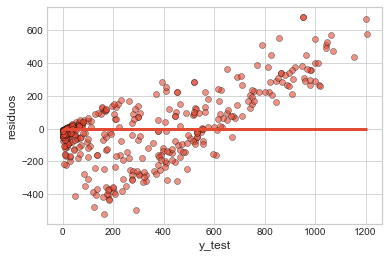

In [97]:
# Visualizamos si se cumple la Homocedasticidad con los residuos del modelo. 
plt.scatter(y_test,residuos,alpha=.6,edgecolor='k')
plt.hlines(0,y_test.min(),y_test.max(),lw=3)
plt.xlabel('y_test')
plt.ylabel('residuos')

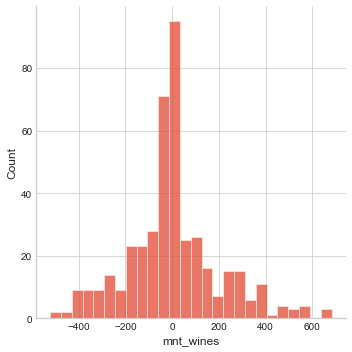

In [98]:
# Homocedasticidad : La varianza de los residuos es constante
# Prueba: Scatter plot de los residuos
# ¿y si no se cumple?:  El modelo no esta generalizando bien
# Solución:  Probar transformaciones --> log por ejemplo

# Distribución de los residuos para identificar si es una distribución Normal
sns.displot(residuos,kde=False)

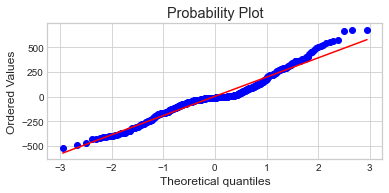

In [99]:
# Normalidad de residuos: Los residuos tienen una distribución normal
# Prueba: QQ-Plot, histograma o Kolmogorov test
# ¿y si no se cumple?: El modelo no esta generalizando bien
# Solución: Probar transformaciones: log por ejemplo


# Q-Q plots
# Si los residuos tuvieran una distribución normal, entonces la mayoría de los puntos azules estarían sobre la línea roja.

fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuos,plot=ax,fit=True)
plt.show()

In [100]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.596215352694998

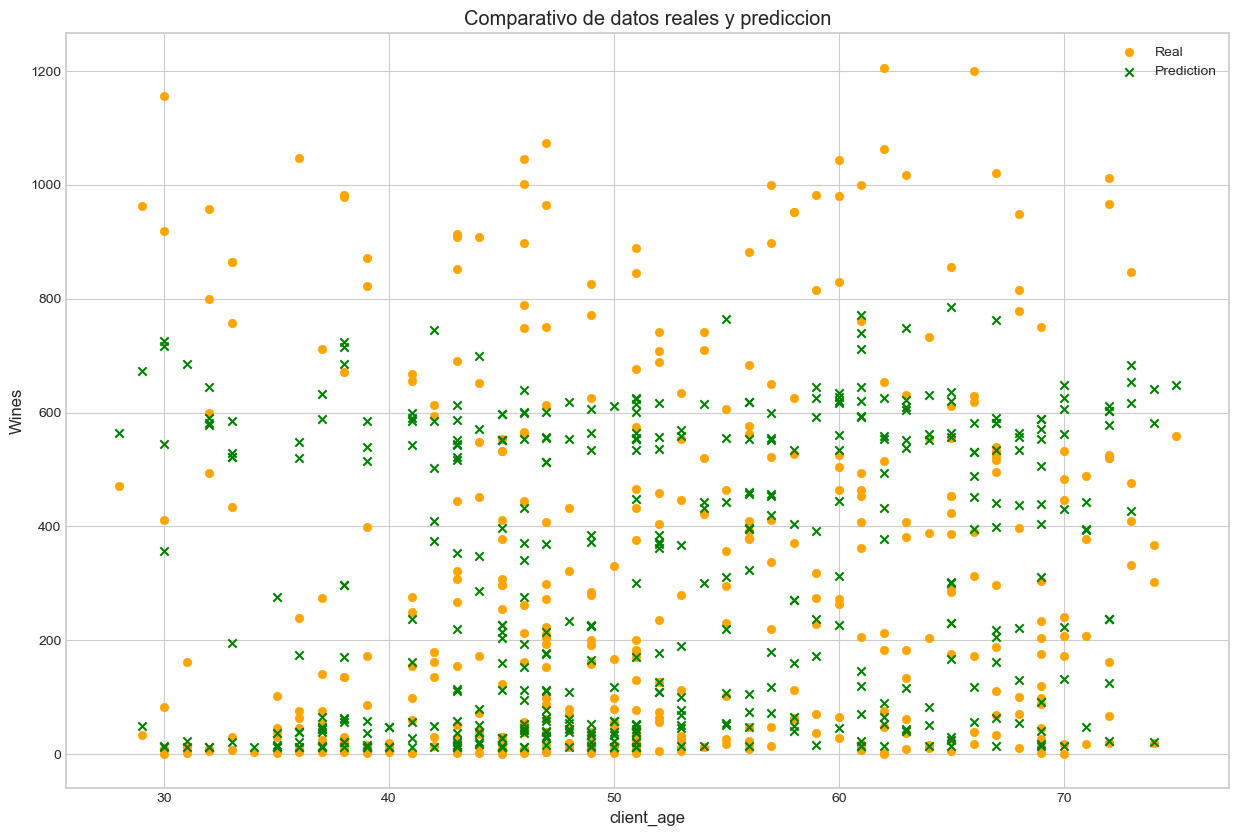

In [101]:
# Comparar valores reales contra predicciones
# Plot
plt.rcParams.update({"figure.figsize":(15,10),"figure.dpi":100})
plt.scatter(compare["client_age"],compare["y_test"],color="orange",marker="o",label="Real")
plt.scatter(compare["client_age"],compare["y_pred"],color="green",marker="x",label="Prediction")
# Labels
plt.title("Comparativo de datos reales y prediccion")
plt.xlabel("client_age")
plt.ylabel('Wines')
plt.legend(loc='best')
plt.show()

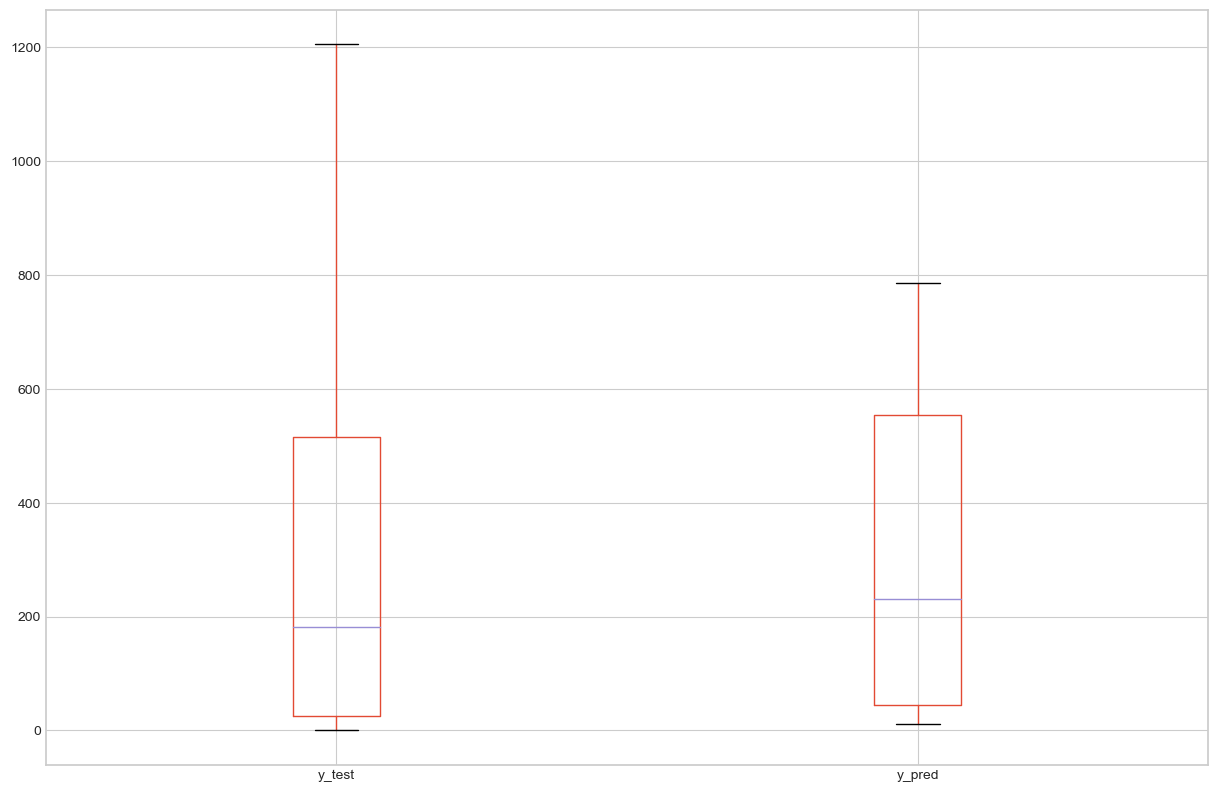

In [102]:
# Boxplot
compare.boxplot(column=["y_test","y_pred"]);

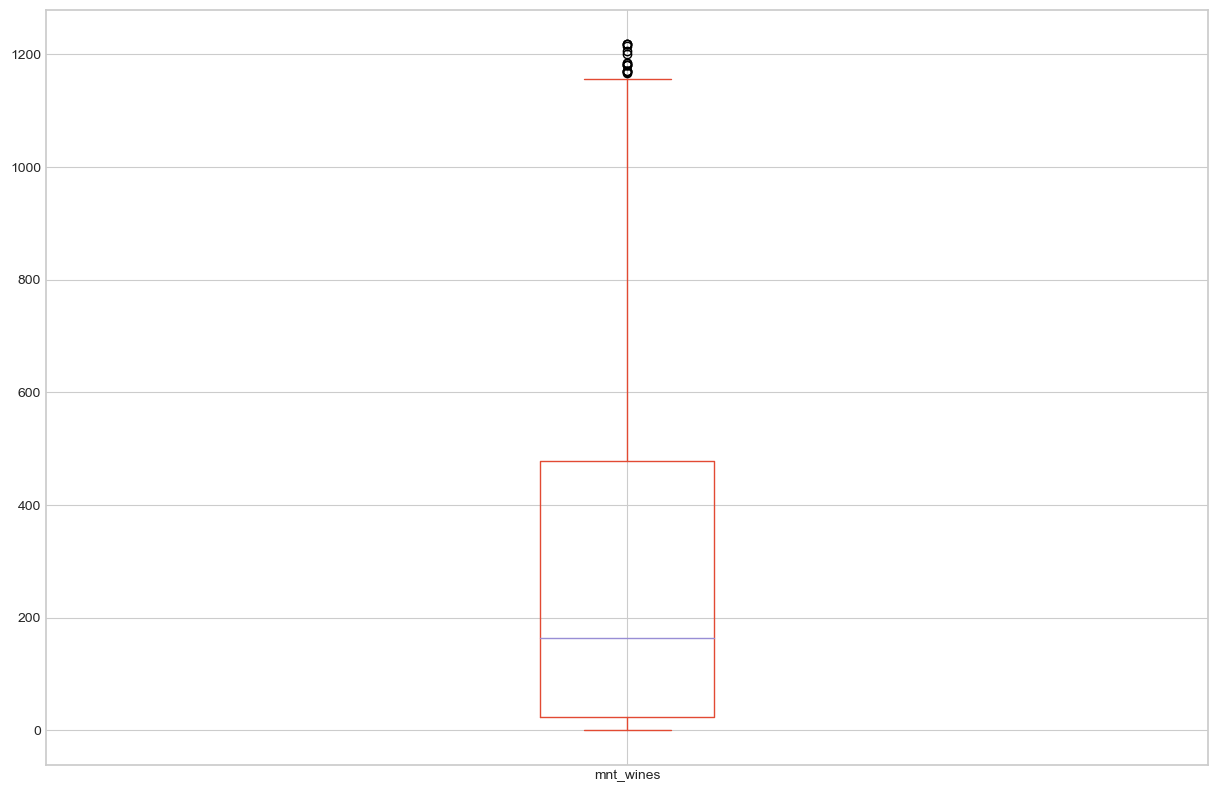

In [103]:
y_train.plot.box();